<a href="https://colab.research.google.com/github/merajsiddieque/DS-LAB/blob/main/DS_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [8]:
import pandas as pd

df = pd.read_csv('/content/yellow_tripdata_sample.csv')
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               995 non-null    int64  
 1   tpep_pickup_datetime   995 non-null    object 
 2   tpep_dropoff_datetime  995 non-null    object 
 3   passenger_count        995 non-null    float64
 4   trip_distance          995 non-null    float64
 5   RatecodeID             995 non-null    float64
 6   store_and_fwd_flag     995 non-null    object 
 7   PULocationID           995 non-null    int64  
 8   DOLocationID           995 non-null    int64  
 9   payment_type           995 non-null    int64  
 10  fare_amount            995 non-null    float64
 11  extra                  995 non-null    float64
 12  mta_tax                995 non-null    float64
 13  tip_amount             995 non-null    float64
 14  tolls_amount           995 non-null    float64
 15  improv

In [10]:
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [11]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1.703518,1.581910,2.890472,1.138693,165.323618,163.204020,1.228141,18.278593,1.741457,0.491960,3.483146,0.197357,0.988945,26.847538,2.326633,0.052764
std,0.456936,0.911625,3.125268,3.126260,67.808656,73.059288,0.486448,14.916422,1.255742,0.077276,4.195507,1.180907,0.144929,18.092018,0.673846,0.309523
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000,-47.800000,-1.000000,-0.500000,0.000000,0.000000,-1.000000,-52.800000,-2.500000,-1.750000
25%,1.000000,1.000000,1.125000,1.000000,114.000000,107.000000,1.000000,9.300000,1.000000,0.500000,0.000000,0.000000,1.000000,16.320000,2.500000,0.000000
50%,2.000000,1.000000,1.960000,1.000000,161.000000,162.000000,1.000000,14.200000,1.000000,0.500000,3.000000,0.000000,1.000000,22.200000,2.500000,0.000000
75%,2.000000,2.000000,3.400000,1.000000,236.000000,236.000000,1.000000,22.600000,3.500000,0.500000,4.820000,0.000000,1.000000,31.770000,2.500000,0.000000
max,2.000000,6.000000,23.900000,99.000000,265.000000,265.000000,4.000000,180.000000,7.750000,0.500000,80.000000,12.750000,1.000000,217.200000,2.500000,1.750000


In [ ]:
df[['passenger_count','trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']].describe()

,passenger_count,trip_distance,fare_amount,total_amount,tip_amount,extra
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1.581910,2.890472,18.278593,26.847538,3.483146,1.741457
std,0.911625,3.125268,14.916422,18.092018,4.195507,1.255742
min,0.000000,0.000000,-47.800000,-52.800000,0.000000,-1.000000
25%,1.000000,1.125000,9.300000,16.320000,0.000000,1.000000
50%,1.000000,1.960000,14.200000,22.200000,3.000000,1.000000
75%,2.000000,3.400000,22.600000,31.770000,4.820000,3.500000
max,6.000000,23.900000,180.000000,217.200000,80.000000,7.750000


In [12]:
df[['passenger_count','trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']].var()

,0
passenger_count,0.831061
trip_distance,9.767299
fare_amount,222.499652
total_amount,327.321108
tip_amount,17.602279
extra,1.576889


In [13]:
df[['passenger_count','trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']].skew()

,0
passenger_count,1.664330
trip_distance,3.288172
fare_amount,3.012440
total_amount,3.025344
tip_amount,7.328237
extra,1.149621


In [14]:
df[['passenger_count','trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']].kurt()

,0
passenger_count,2.827890
trip_distance,13.975566
fare_amount,20.739873
total_amount,20.194071
tip_amount,115.485646
extra,0.717987


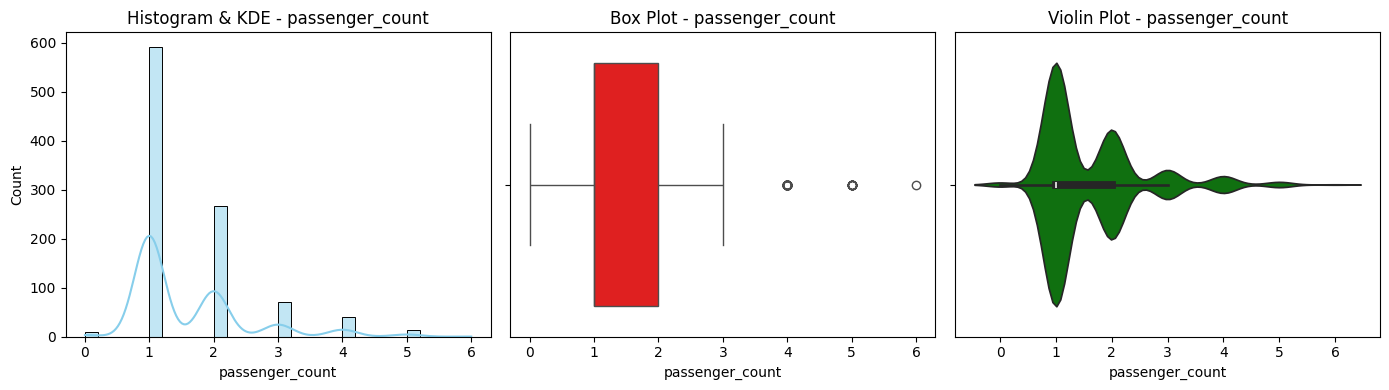

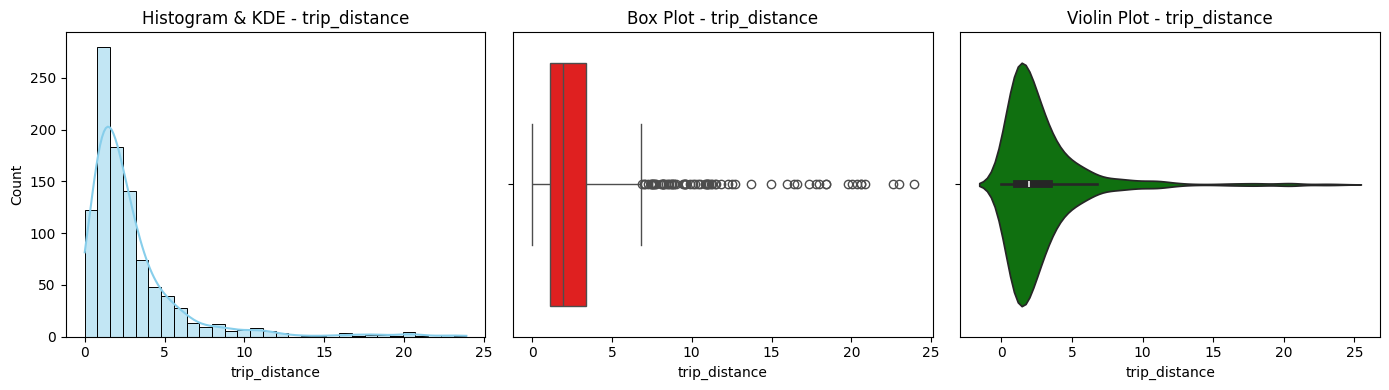

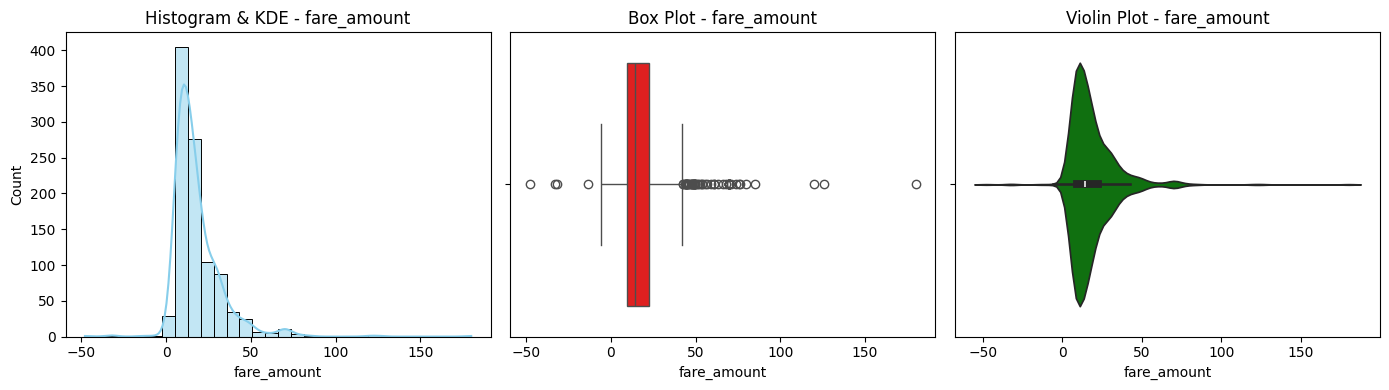

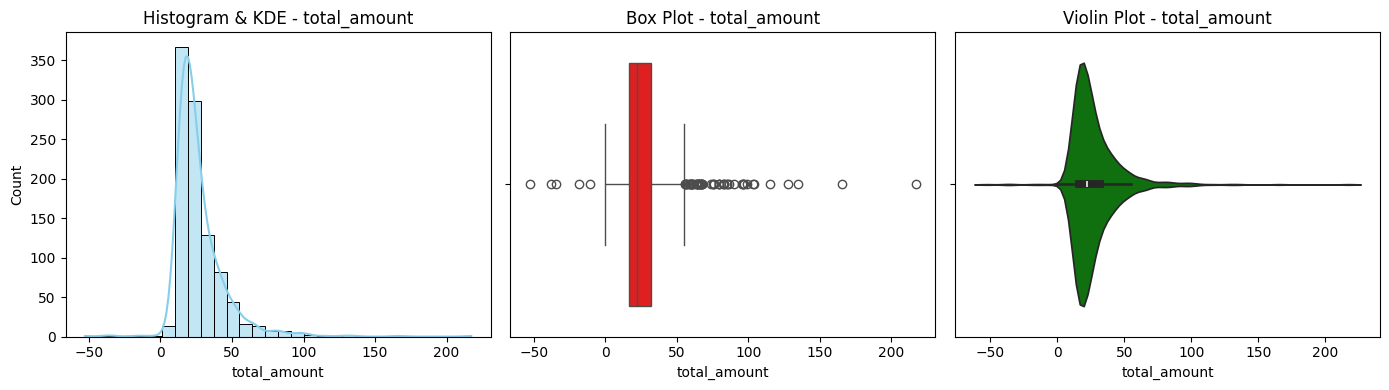

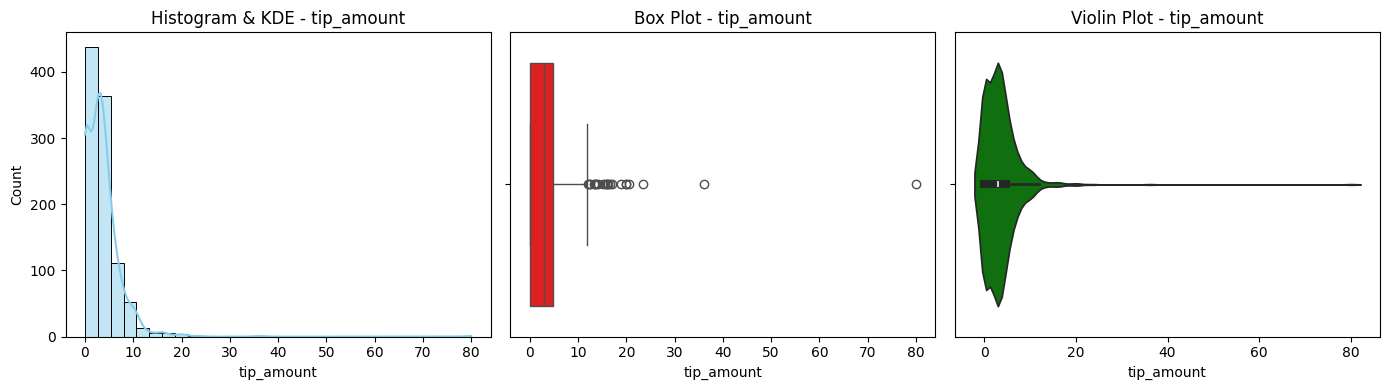

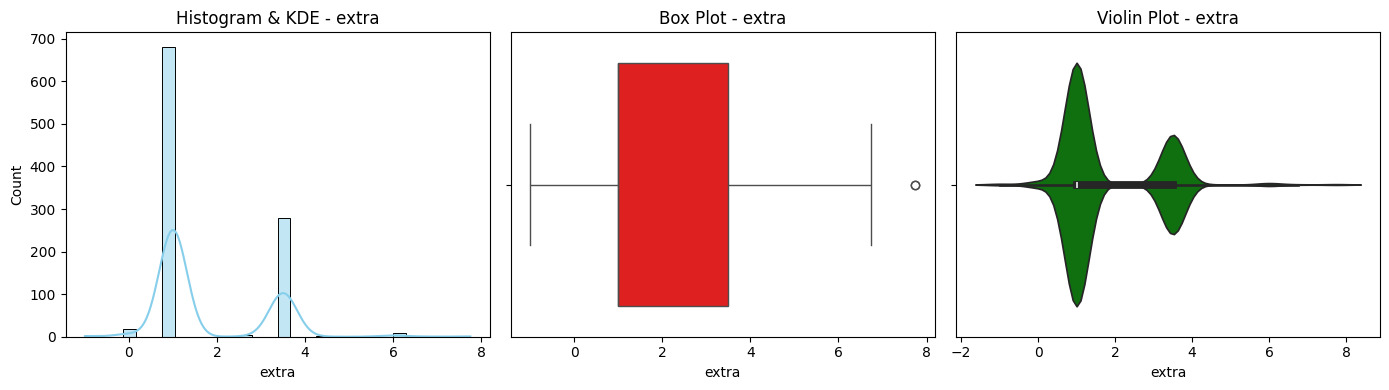

In [ ]:
# Columns to plot
columns = ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']

for col in columns:
    plt.figure(figsize=(14, 4))

    # Histogram + KDE
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram & KDE - {col}')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col], color='red')
    plt.title(f'Box Plot - {col}')

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df[col], color='green')
    plt.title(f'Violin Plot - {col}')

    plt.tight_layout()
    plt.show()


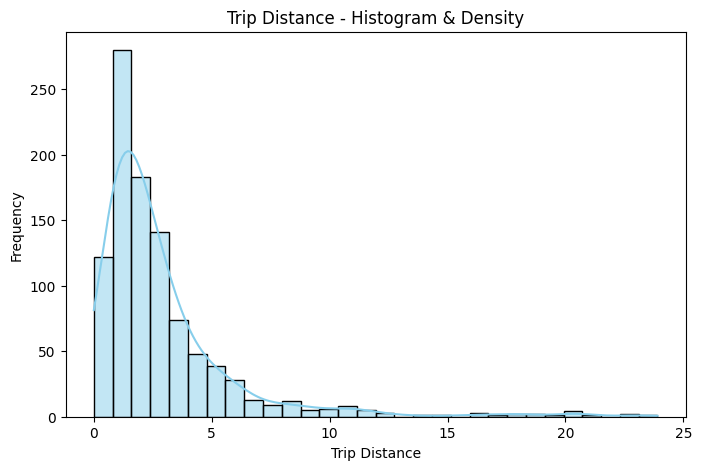

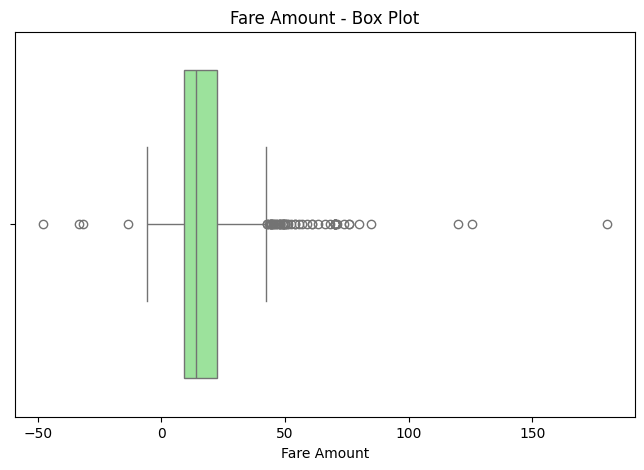

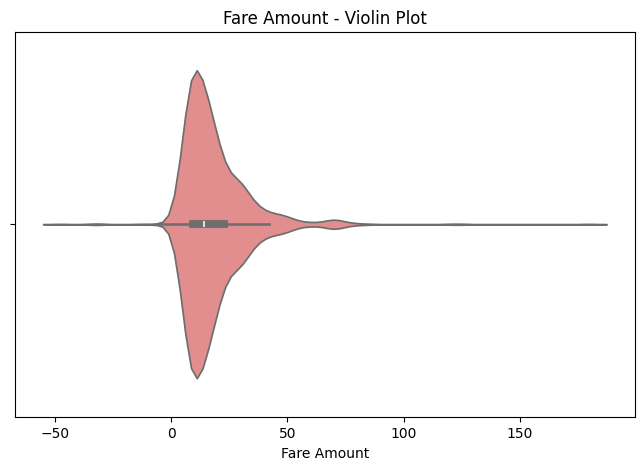

/tmp/ipython-input-2675097868.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='payment_type', y='fare_amount', data=df, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-2675097868.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='fare_amount', data=df, estimator='mean', ci=None, palette='pastel')


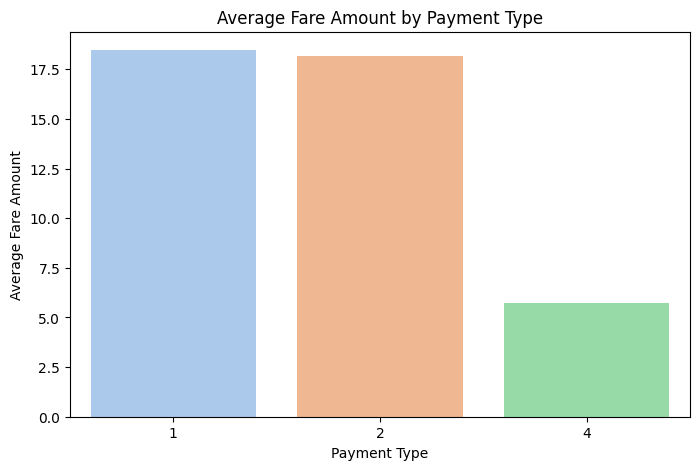

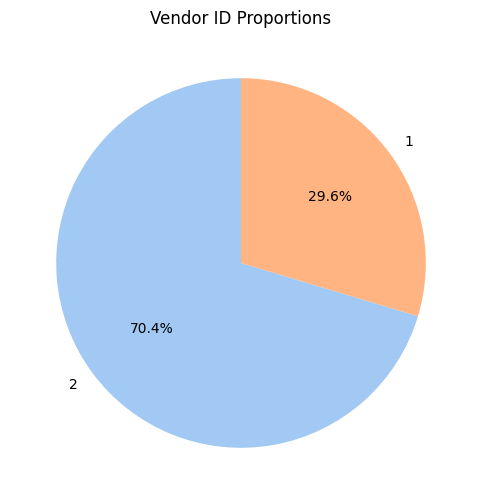

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram + Density
plt.figure(figsize=(8, 5))
sns.histplot(df['trip_distance'], kde=True, bins=30, color='skyblue')
plt.title('Trip Distance - Histogram & Density')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['fare_amount'], color='lightgreen')
plt.title('Fare Amount - Box Plot')
plt.xlabel('Fare Amount')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['fare_amount'], color='lightcoral')
plt.title('Fare Amount - Violin Plot')
plt.xlabel('Fare Amount')
plt.show()

# Bar Chart for Payment Type
plt.figure(figsize=(8, 5))
sns.barplot(x='payment_type', y='fare_amount', data=df, estimator='mean', ci=None, palette='pastel')
plt.title('Average Fare Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Fare Amount')
plt.show()

# Pie Chart for Vendor ID
plt.figure(figsize=(6, 6))
df['VendorID'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Vendor ID Proportions')
plt.ylabel('')
plt.show()


In [22]:
mean = df['trip_distance'].mean()
sem = stats.sem(df['trip_distance'])
ci = stats.t.interval(0.95, len(df['trip_distance'])-1, loc=mean, scale=sem)
print("95% CI for Trip Distance:", ci)


95% CI for Trip Distance: (np.float64(2.6960469945886643), np.float64(3.0848977290294264))


In [23]:
stats.ttest_1samp(df['tip_amount'], 2)


TtestResult(statistic=np.float64(11.150925555592355), pvalue=np.float64(2.7284426078462357e-27), df=np.int64(994))

In [24]:
credit = df[df['payment_type'] == 1]['fare_amount']  # example code for credit
cash = df[df['payment_type'] == 2]['fare_amount']    # example code for cash
stats.ttest_ind(credit, cash, equal_var=False)


TtestResult(statistic=np.float64(0.24718152792576853), pvalue=np.float64(0.8049474196415387), df=np.float64(282.28283799549035))

In [27]:
contingency = pd.crosstab(df['payment_type'], df['RatecodeID'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)


<Axes: >

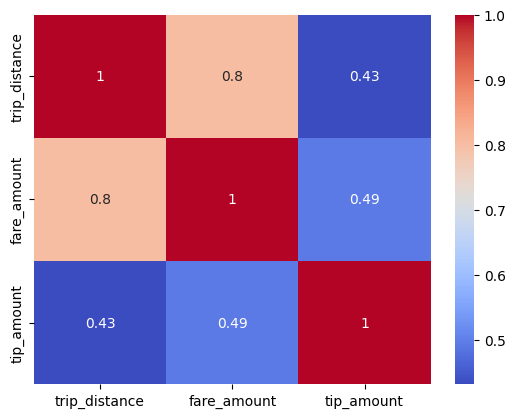

In [28]:
pearson_corr = df[['trip_distance','fare_amount','tip_amount']].corr(method='pearson')
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')


<Axes: xlabel='tpep_pickup_datetime'>

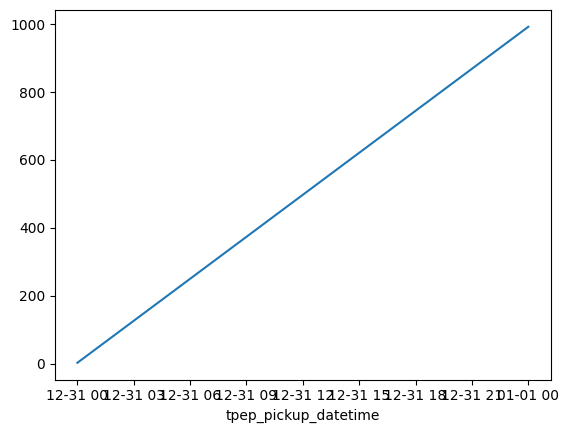

In [29]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.groupby(df['tpep_pickup_datetime'].dt.date).size().plot()


<Axes: xlabel='hour', ylabel='fare_amount'>

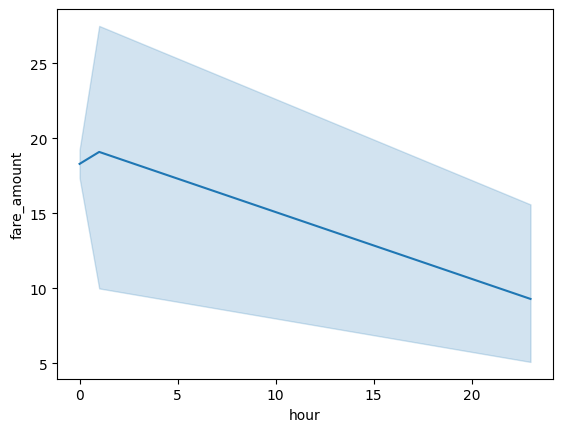

In [30]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour
sns.lineplot(x='hour', y='fare_amount', data=df)


# ***Observations from the NYC Yellow Taxi Dataset***

1. Passenger Count – The majority of trips have 1 passenger, indicating that most rides are individual rather than group rides.

2. Vendor Distribution – Vendor 2 has provided more trips compared to Vendor 1, suggesting either a larger fleet or higher trip demand for Vendor 2.

3. Data Completeness – The dataset contains no null values, indicating good data quality and readiness for analysis without missing value imputation.

4. Payment Method – The most common payment type is Type 1 (Credit Card), showing that passengers prefer cashless transactions over cash.